In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import special as sc
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

In [2]:
def r_grid(low, high, resolution, center=(0., 0.)):
    """
    Compute a grid of radii on a square, between (x, y) = (low, low) to (high, high)
    :param low: float
    :param high: float
    :param resolution: int, number of pixels in one direction
    :param center: coordinates of the center (origin) point of the grid
    :return: 2D array of floats
    """
    x = np.linspace(low, high, resolution)
    y = np.linspace(low, high, resolution)
    xx, yy = np.meshgrid(x, y, sparse=True)
    _r = np.sqrt((xx - center[0])**2 + (yy - center[1])**2)
    return _r

In [3]:
def normalized_kdiff(_r):
    """
    Compute the normalized K_diffusion at radius _r
    :param _r : number or array of positive numbers
    """
    j_1 = sc.jv(1, _r)
    return (2 * j_1 / _r) ** 2

def airy_sq(low, high, resolution):
    """
    Compute Airy point spread on a square from (x, y) = (low, low) to (high, high)
    :param low : float
    :param high : float
    :param resolution : int, number of pixels in one direction
    """
    _r = r_grid(low, high, resolution)
    airy_normalized = normalized_kdiff(_r)
    return airy_normalized

In [4]:
# Q3
def kdiff_saturated(_r, saturation):
    res = normalized_kdiff(_r)
    saturated_res = np.minimum(res, saturation)
    return saturated_res

def airy_saturated(low, high, resolution, saturation):
    _r = r_grid(low, high, resolution)
    airy_sat = kdiff_saturated(_r, saturation)
    return airy_sat

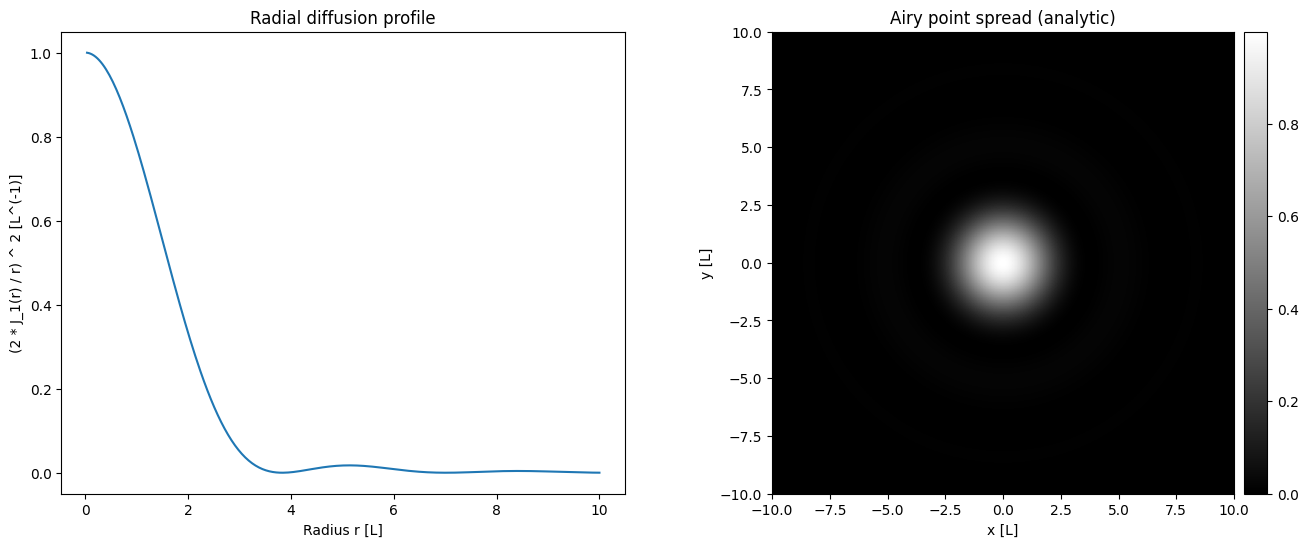

In [5]:
# Q1
r = np.linspace(0, 10, 300)[1:]  # slice to avoid r[0] == 0
kdiff = normalized_kdiff(r)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(r, kdiff)
ax[0].set_title('Radial diffusion profile')
ax[0].set_xlabel('Radius r [L]')
ax[0].set_ylabel('(2 * J_1(r) / r) ^ 2 [L^(-1)]')

# Q2
airy_analytic = airy_sq(-10, 10, 300)
im = ax[1].imshow(airy_analytic, extent=[-10, 10, -10, 10], cmap='gray', origin='lower')
ax[1].set_title('Airy point spread (analytic)')
ax[1].set_xlabel('x [L]')
ax[1].set_ylabel('y [L]')
div = make_axes_locatable(ax[1])
cax = div.append_axes('right', size='5%', pad=0.1)
_ = fig.colorbar(im, cax=cax)

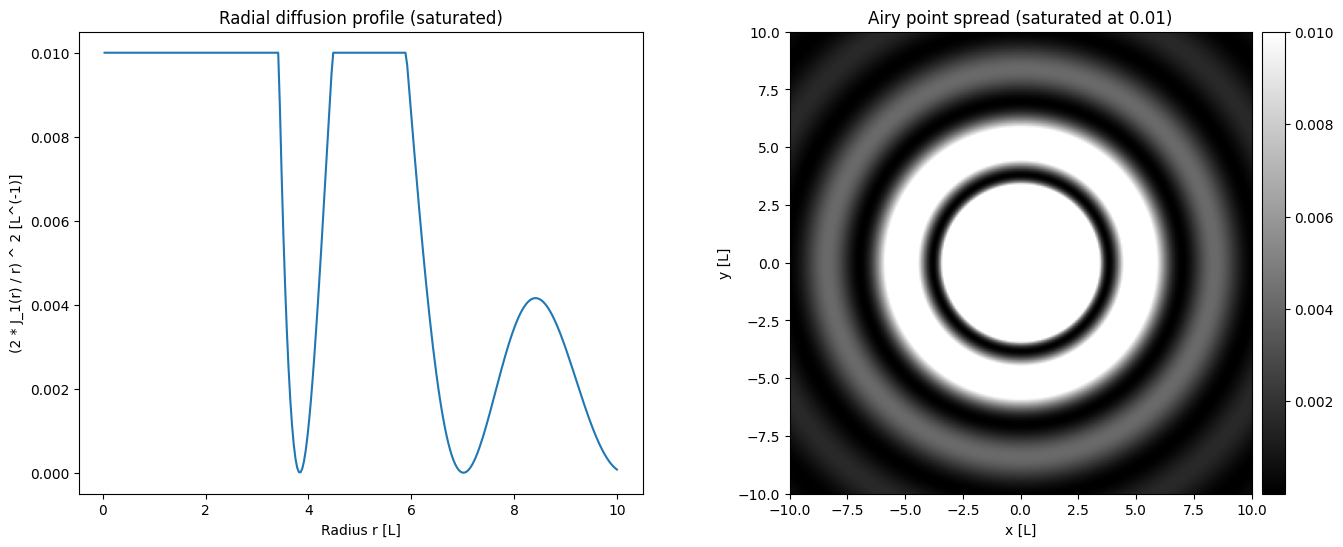

In [6]:
_saturation = 0.01

r = np.linspace(0, 10, 300)[1:]  # slice to avoid r[0] == 0
kdiff_sat = kdiff_saturated(r, _saturation)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(r, kdiff_sat)
ax[0].set_title('Radial diffusion profile (saturated)')
ax[0].set_xlabel('Radius r [L]')
ax[0].set_ylabel('(2 * J_1(r) / r) ^ 2 [L^(-1)]')

airy_sat = airy_saturated(-10, 10, 300, _saturation)
im = ax[1].imshow(airy_sat, extent=[-10, 10, -10, 10], cmap='gray', origin='lower')
ax[1].set_title(f'Airy point spread (saturated at {_saturation})')
ax[1].set_xlabel('x [L]')
ax[1].set_ylabel('y [L]')
div = make_axes_locatable(ax[1])
cax = div.append_axes('right', size='5%', pad=0.1)
_ = fig.colorbar(im, cax=cax)

In [7]:
# Tests with different params
# import itertools
# fig, ax = plt.subplots(4, 4, figsize=(24, 24))
# saturations = [1e-2, 1e-4, 1e-5, 1e-7]
# resolutions = [50, 250, 500, 800]
# params = itertools.product(saturations, resolutions)
# for i, (_sat, _res) in enumerate(params):
#     row_idx = i//4
#     col_idx = i%4
#     airy_sat = airy_saturated(-10, 10, _res, _sat)
#     ax[row_idx][col_idx].imshow(airy_sat, extent=[-10, 10, -10, 10], cmap='gray')
#     ax[row_idx][col_idx].set_title(f'Resolution = {_res}², saturation = {_sat}')

Text(0.5, 1.0, 'Resolution = 800, saturation = 1e-05')

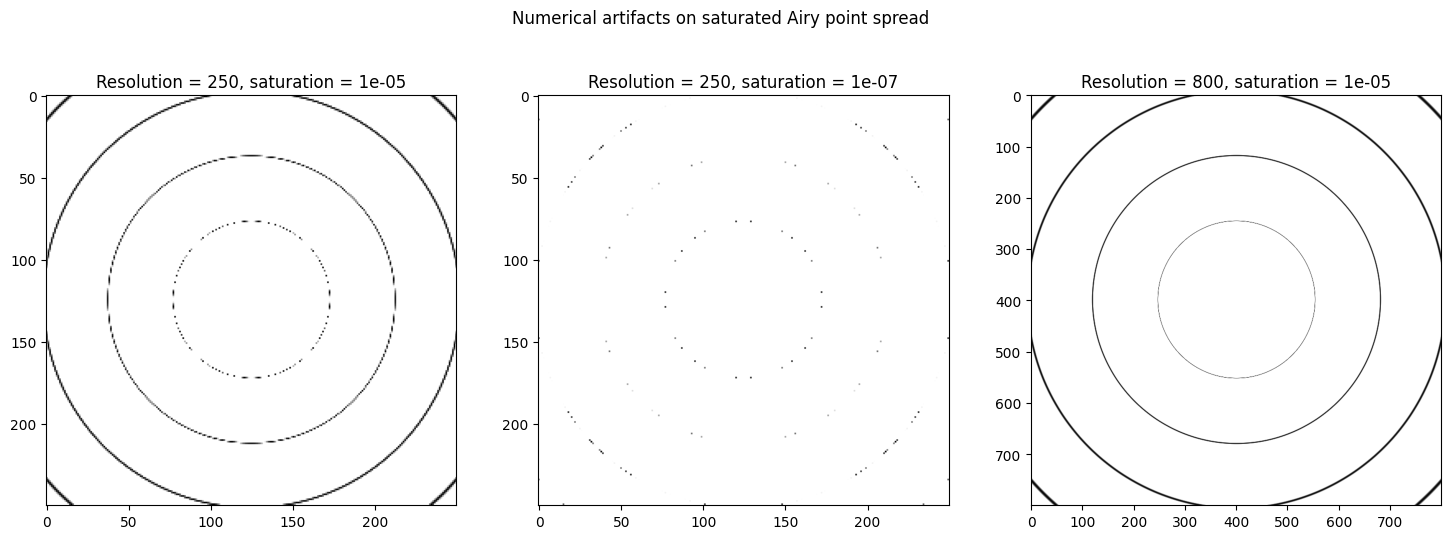

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Numerical artifacts on saturated Airy point spread')
ax[0].imshow(airy_saturated(-10, 10, resolution=250, saturation=1e-05), cmap='gray')
ax[0].set_title(f'Resolution = 250, saturation = 1e-05')
ax[1].imshow(airy_saturated(-10, 10, resolution=250, saturation=1e-07), cmap='gray')
ax[1].set_title(f'Resolution = 250, saturation = 1e-07')
ax[2].imshow(airy_saturated(-10, 10, resolution=800, saturation=1e-05), cmap='gray')
ax[2].set_title(f'Resolution = 800, saturation = 1e-05')


False

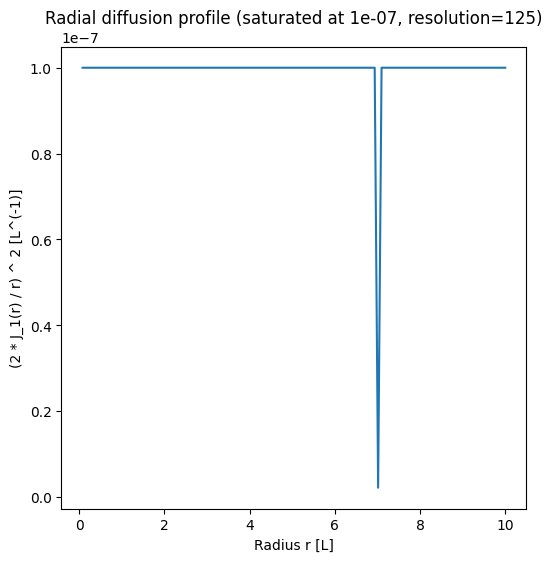

In [9]:
_saturation = 1e-7

r = np.linspace(0, 10, 125)[1:]  # slice to avoid r[0] == 0
kdiff_sat = kdiff_saturated(r, _saturation)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(r, kdiff_sat)
ax.set_title(f'Radial diffusion profile (saturated at {_saturation}, resolution=125)')
ax.set_xlabel('Radius r [L]')
ax.set_ylabel('(2 * J_1(r) / r) ^ 2 [L^(-1)]')
np.all(kdiff_sat == kdiff_sat[0])

In [10]:
test = airy_saturated(-10, 10, 250, 1e-07)
test2 = kdiff_saturated(r_grid(-10, 10, 250), 1e-07)
np.all(test2 == test2[0][0])

False

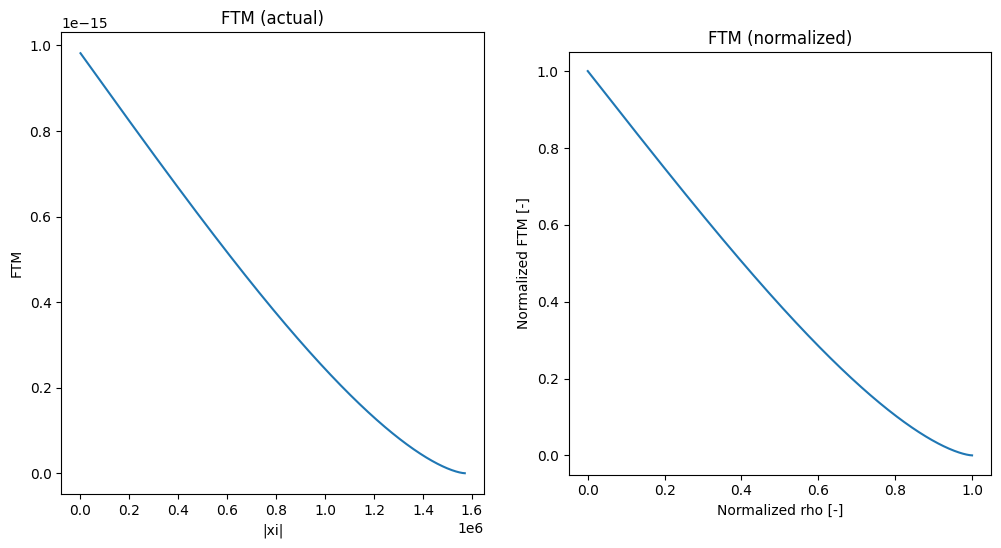

In [11]:
# Q3
def ftm_normalized(rho):
    return np.arccos(rho) - rho * np.sqrt(1 - rho**2)

def ftm(xi, diam=0.10, _lambda=500e-9, f=0.80):
    rho = np.abs(xi) * (_lambda * f) / (2 * np.pi * diam)
    _res = ((_lambda * diam) ** 2 / 4) * ftm_normalized(rho)
    return np.abs(_res)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
xi_max = (2 * np.pi * 0.10) / (500e-9 * 0.80)
_xi = np.linspace(0, xi_max, 1000)
ftm_actual = ftm(_xi)
ax[0].plot(_xi, ftm_actual)
ax[0].set_title('FTM (actual)')
ax[0].set_xlabel('|xi|')
ax[0].set_ylabel('FTM')

rho_range = np.linspace(0, 1, 500)
ftm_nrm = ftm_normalized(rho_range)
ax[1].plot(rho_range, ftm_nrm / np.max(ftm_nrm))
ax[1].set(aspect='equal')
ax[1].set_title('FTM (normalized)')
ax[1].set_xlabel('Normalized rho [-]')
_ = ax[1].set_ylabel('Normalized FTM [-]')

/tmp/ipykernel_5006/3430642358.py:3: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(rho) - rho * np.sqrt(1 - rho**2)
/tmp/ipykernel_5006/3430642358.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.arccos(rho) - rho * np.sqrt(1 - rho**2)


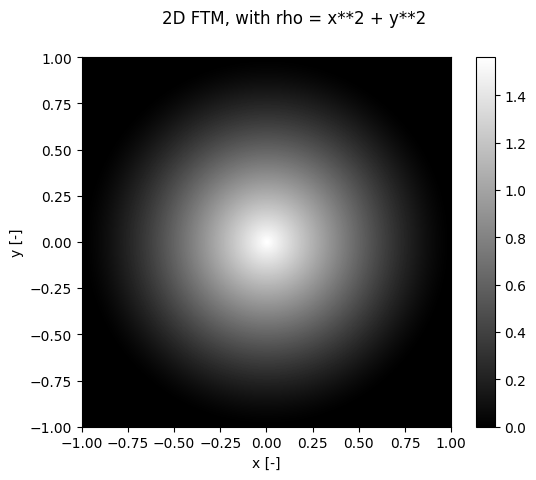

In [12]:
r = r_grid(-1, 1, 300)
ftm_2d = np.nan_to_num(ftm_normalized(r), nan=0.)  # values where rho > 1 are set to 0
plt.imshow(ftm_2d, cmap='gray', extent=[-1, 1, -1, 1])
plt.suptitle('2D FTM, with rho = x**2 + y**2')
plt.xlabel('x [-]')
plt.ylabel('y [-]')
_ = plt.colorbar()

In [13]:
resolution = 2049  # odd number, to have an actual center

airy = np.nan_to_num(airy_sq(-100, 100, resolution), nan=1.)
pixel_length = 200 / resolution

/tmp/ipykernel_5006/2586772151.py:7: RuntimeWarning: invalid value encountered in divide
  return (2 * j_1 / _r) ** 2


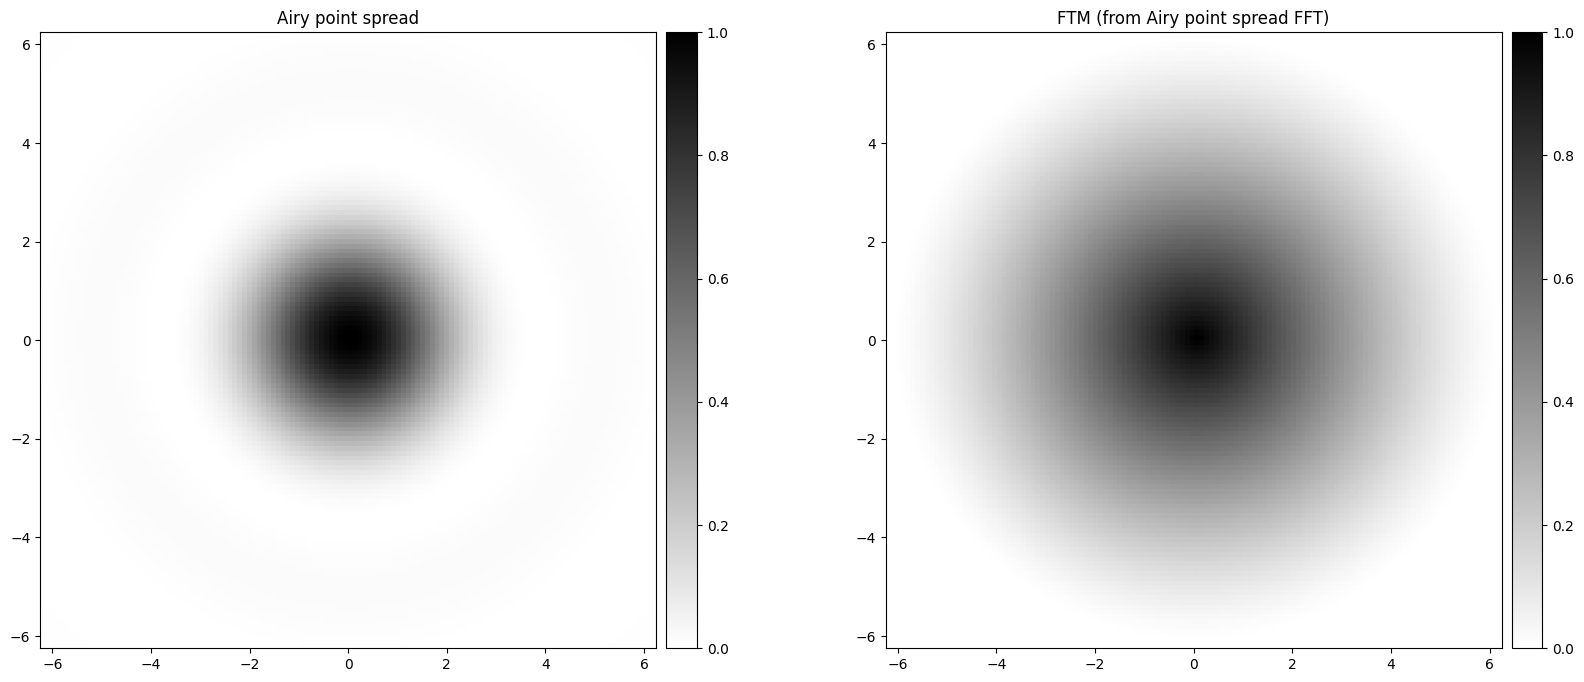

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
divs = [make_axes_locatable(ax[i]) for i in range(len(ax))]
caxs = [div.append_axes('right', size='5%', pad=0.1) for div in divs]

# Slice the image to zoom on the center
window = 64
airy_zoom = airy[resolution//2 - window:resolution//2 + window,
                 resolution//2 - window:resolution//2 + window]
im = ax[0].imshow(airy_zoom,
                  extent=pixel_length * np.array([-window, window, -window, window]),
                  cmap='gray_r',
                  origin='lower')
ax[0].set_title('Airy point spread')
fig.colorbar(im, cax=caxs[0])

airy_fft = np.fft.fft2(airy)
shifted = np.fft.fftshift(airy_fft)
airy_fft_m = np.abs(shifted)
airy_fft_zoom = airy_fft_m[resolution//2 - window:resolution//2 + window,
                           resolution//2 - window:resolution//2 + window]
ax[1].imshow(airy_fft_zoom,
             extent=pixel_length * np.array([-window, window, -window, window]),
             cmap='gray_r',
             origin='lower')
ax[1].set_title('FTM (from Airy point spread FFT)')
fig.colorbar(im, cax=caxs[1])

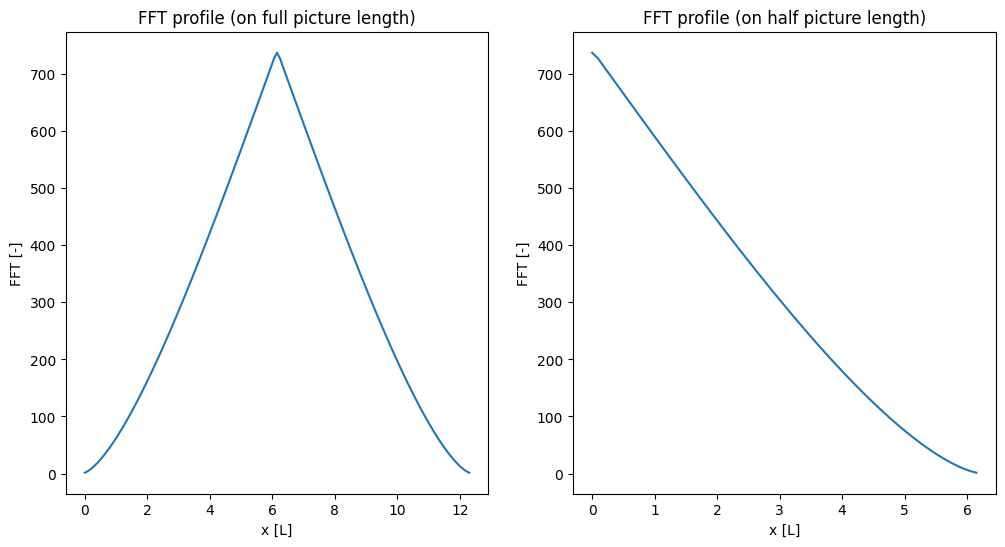

In [62]:
airy_midline = airy_fft_m[resolution//2, :]

# filter out the very small values (get support)
airy_fft_max = np.max(airy_midline)
supp = airy_midline > 1e-3 * airy_fft_max
airy_fft_support = airy_midline[supp]

n = len(airy_fft_support)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(pixel_length * np.array(range(n)), airy_fft_support)
ax[0].set_title('FFT profile (on full picture length)')
ax[1].plot(pixel_length * np.array(range(n//2 + 1)), airy_fft_support[n//2:])
ax[1].set_title('FFT profile (on half picture length)')
for _ax in ax:
    _ax.set_xlabel('x [L]')
    _ax.set_ylabel('FFT [-]')

In [16]:
# Q4
def r_linear(low, high, resolution, center=0.):
    """
    Compute an 1D array of distances from the center
    """
    _r = np.linspace(low, high, resolution)
    return np.abs(_r - center)

Text(0, 0.5, 'Intensity, normalized [-]')

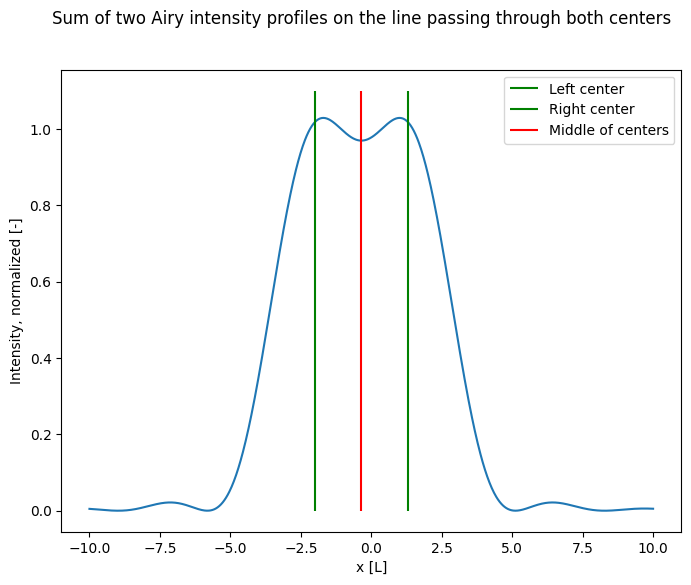

In [17]:
resolution = 1000
left_center = -2.
right_center = 1.3

airy_left = normalized_kdiff(r_linear(-10, 10, resolution, center=left_center))
airy_right = normalized_kdiff(r_linear(-10, 10, resolution, center=right_center))

x = np.linspace(-10, 10, resolution)
fig = plt.figure(figsize=(8, 6))
plt.plot(x, airy_left + airy_right)
plt.vlines(x=left_center, ymin=0, ymax=1.1, label='Left center', colors='g')
plt.vlines(x=right_center, ymin=0, ymax=1.1, label='Right center', colors='g')
plt.vlines(x=(left_center + right_center) / 2, ymin=0, ymax=1.1,
           label='Middle of centers', colors='r')
plt.legend()
plt.suptitle('Sum of two Airy intensity profiles on the line passing through both centers')
plt.xlabel('x [L]')
plt.ylabel('Intensity, normalized [-]')

In [18]:
xc_l = -2.0
xc_r = 1.3
x_mid = (xc_l + xc_r) / 2
step_size = 0.3
min_step_size = 1e-5
airy_left = np.nan_to_num(normalized_kdiff(r_linear(-2, 2, resolution, center=xc_l)), nan=1.)
airy_right = np.nan_to_num(normalized_kdiff(r_linear(-2, 2, resolution, center=xc_r)), nan=1.)
airy_max = np.max(airy_left + airy_right)
diff = normalized_kdiff(xc_r - x_mid) + normalized_kdiff(x_mid - xc_l) - airy_max

while diff < 0:
    dist = xc_r - xc_l
    step = max(step_size * diff, min_step_size)
    xc_r = xc_r - step
    x_mid -= step / 2
    airy_right = np.nan_to_num(normalized_kdiff(r_linear(-2.0, 2.0, resolution, center=xc_r)), nan=1.)
    airy_sum = airy_left + airy_right

    # slice to aid np.max
    diff = (normalized_kdiff(xc_r - x_mid) + normalized_kdiff(x_mid - xc_l)
            - np.max(airy_sum[int(resolution * (1 - (2 - x_mid) / 4)):
                              int(resolution * (1 - (2 - xc_r) / 4))]))

/tmp/ipykernel_5006/2586772151.py:7: RuntimeWarning: invalid value encountered in divide
  return (2 * j_1 / _r) ** 2


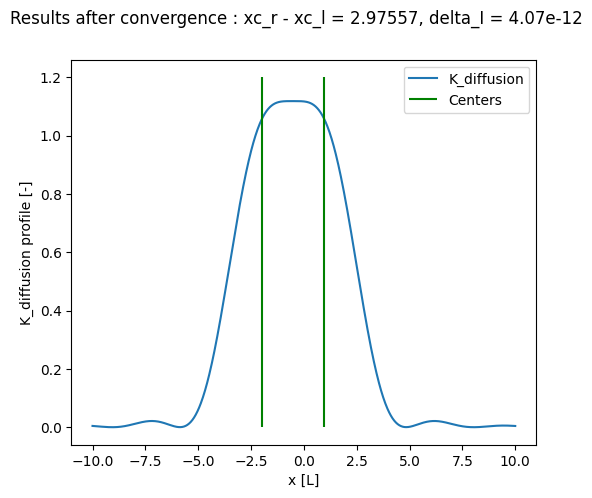

In [19]:
airy_left = np.nan_to_num(normalized_kdiff(r_linear(-10, 10, resolution, center=xc_l)), nan=1.)
airy_right = np.nan_to_num(normalized_kdiff(r_linear(-10, 10, resolution, center=xc_r)), nan=1.)

x = np.linspace(-10, 10, resolution)
fig = plt.figure(figsize=(6, 5))
plt.plot(x, airy_left + airy_right, label='K_diffusion')
plt.vlines(x=[xc_r, xc_l], ymin=0, ymax=1.2, colors=['g', 'g'], label='Centers')
plt.xlabel('x [L]')
plt.ylabel('K_diffusion profile [-]')
plt.suptitle(f'Results after convergence : xc_r - xc_l = '
             f'{"{:.5f}".format(xc_r - xc_l)}, delta_I = {"{:.2e}".format(diff)}')
plt.legend()

In [20]:
_saturation = 0.01
r = np.linspace(3.5, 4, 50000)  # 50k points on [3.5, 4] => precision = 1e-5
kdiff_sat = kdiff_saturated(r, _saturation)
r_a_idx = np.argmin(kdiff_sat)
print(f'Airy radius : r_a = {"{:.5e}".format(r[r_a_idx])}')
print(f'r_critical / r_a = {"{:.5e}".format((xc_r - xc_l) / r[r_a_idx])}')

Airy radius : r_a = 3.83171e+00
r_critical / r_a = 7.76565e-01


In [21]:
def kdiff_telescope(_r, epsilon):
    return (1 - epsilon)**2 * normalized_kdiff(_r)

def airy_telescope(low, high, resolution, epsilon):
    _r = r_grid(low, high, resolution)
    return kdiff_telescope(_r, epsilon)

/tmp/ipykernel_5006/2586772151.py:7: RuntimeWarning: invalid value encountered in divide
  return (2 * j_1 / _r) ** 2


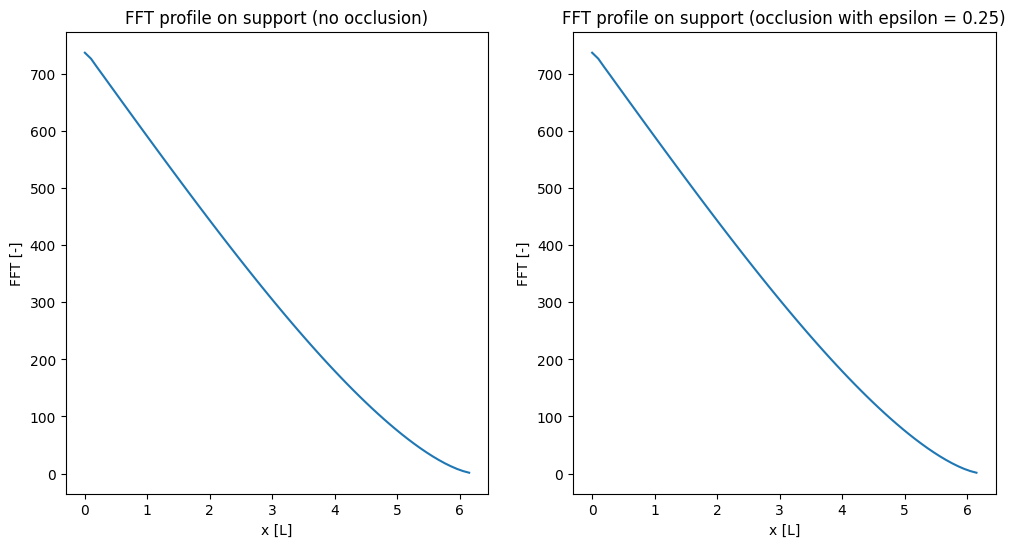

In [68]:
# Q3 codes, with these new functions
resolution = 2049  # odd number, to have an actual center
pixel_length = 200 / resolution
epsilon = .25

airy_t = np.nan_to_num(airy_telescope(-100, 100, resolution, epsilon=epsilon), nan=1.)
airy_fft = np.fft.fft2(airy_t)
shifted = np.fft.fftshift(airy_fft)
airy_fft_m = np.abs(shifted)
airy_midline_t = airy_fft_m[resolution//2, :]
# filter out the very small values (get support)
airy_fft_max = np.max(airy_midline_t)
supp_t = airy_midline_t > 1e-3 * airy_fft_max
airy_fft_support_t = airy_midline[supp_t]
n_telescope = len(airy_fft_support_t)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(pixel_length * np.array(range(n//2 + 1)), airy_fft_support[n//2:])
ax[0].set_title('FFT profile on support (no occlusion)')
ax[1].plot(pixel_length * np.array(range(n_telescope//2 + 1)), airy_fft_support_t[n_telescope//2:])
ax[1].set_title(f'FFT profile on support (occlusion with epsilon = {"{:.2f}".format(epsilon)})')
for _ax in ax:
    _ax.set_xlabel('x [L]')
    _ax.set_ylabel('FFT [-]')

# Check that the supports are the same
assert np.array_equal(supp, supp_t)